In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

In C:\Users\Monika\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Monika\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Monika\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\Monika\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Monika\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_tes

### Load the dataset

- Load the train data and using all your knowledge of pandas try to explore the different statistical properties of the dataset.

In [2]:
# Code starts here
train = pd.read_csv('train.csv')
train
# Code ends here.

,Id,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,1182,25,0,30.300,0,0,3,2632.99200,1
1,990,26,0,19.800,1,0,3,3378.91000,0
2,123,44,1,31.350,1,1,0,39556.49450,1
3,184,44,1,30.690,2,0,2,7731.42710,0
4,1167,29,0,24.600,2,0,3,4529.47700,0
...,...,...,...,...,...,...,...,...,...
1065,335,64,1,34.500,0,0,3,13822.80300,1
1066,618,19,0,33.110,0,1,2,34439.85590,1
1067,227,58,0,41.910,0,0,2,24227.33724,1
1068,713,20,1,40.470,0,0,0,1984.45330,1


In [3]:
#Shape of the data
print('Sape of the train data : ',train.shape)

Sape of the train data :  (1070, 9)


In [4]:
# Statistical properties of the data.
print('Statistical Properties of the train data are as follows: ')
print(train.describe())

Statistical Properties of the train data are as follows: 
                Id          age          sex          bmi     children  \
count  1070.000000  1070.000000  1070.000000  1070.000000  1070.000000   
mean    668.617757    39.030841     0.495327    30.490196     1.128037   
std     385.470930    13.951271     0.500212     6.109707     1.211675   
min       1.000000    18.000000     0.000000    15.960000     0.000000   
25%     333.250000    27.000000     0.000000    26.030000     0.000000   
50%     676.500000    39.000000     0.000000    30.140000     1.000000   
75%    1000.500000    51.000000     1.000000    34.320000     2.000000   
max    1337.000000    64.000000     1.000000    53.130000     5.000000   

            smoker       region       charges  insuranceclaim  
count  1070.000000  1070.000000   1070.000000     1070.000000  
mean      0.203738     1.516822  13262.895208        0.568224  
std       0.402965     1.110035  12125.948212        0.495555  
min       0.000000 

In [5]:
# Drop the Id.
train.drop('Id',axis=1,inplace=True)

Text(0, 0.5, 'No of Counts')

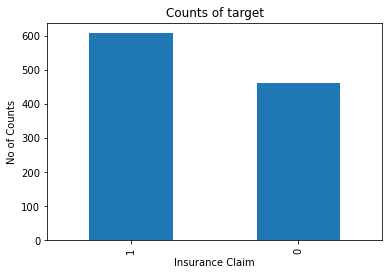

In [6]:
# Checking for the distribution of the target
train['insuranceclaim'].value_counts().plot(kind='bar')
plt.title('Counts of target')
plt.xlabel('Insurance Claim')
plt.ylabel('No of Counts')

In [7]:
# Checking for skewness in the features
print('Skewness for the different features is as shown below: ')
print(train.skew())

Skewness for the different features is as shown below: 
age               0.071193
sex               0.018719
bmi               0.357077
children          0.900842
smoker            1.473163
region           -0.036303
charges           1.521464
insuranceclaim   -0.275861
dtype: float64


### EDA & Data Preprocessing

- Check for the categorical & continuous features. 
- Check out the best plots for plotting between categorical target and continuous features and try making some inferences from these plots.

<AxesSubplot:>

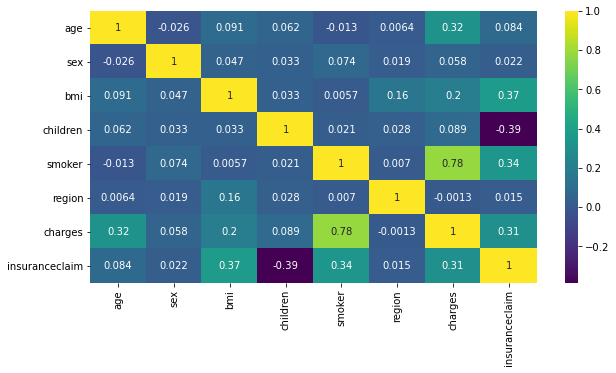

In [8]:
# Code starts here
cm = train.corr()
plt.figure(figsize=(10,5))
sns.heatmap(cm,annot=True,cmap = 'viridis')
# Code ends here.

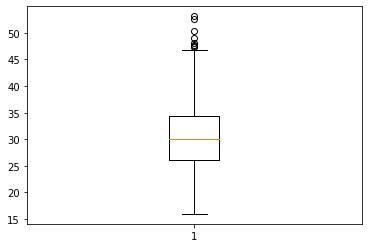

1    0.568224
0    0.431776
Name: insuranceclaim, dtype: float64

In [9]:
plt.boxplot(train['bmi'])
plt.show()

#Set quantile (0.95)
q_value = train['bmi'].quantile(0.95)

#Check value counts
train['insuranceclaim'].value_counts(normalize = True)

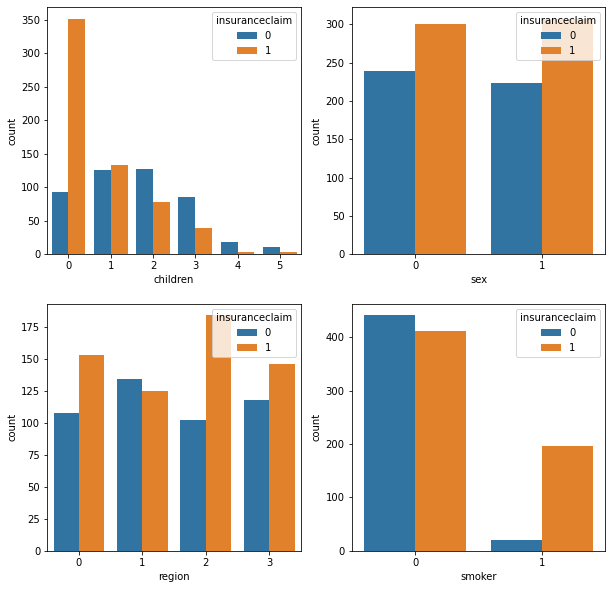

In [10]:
cols = ['children', 'sex','region','smoker']

#Create subplot

fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (10,10))

#Create loop for plottiing countplot
for i in range(0,2):
    for j in range(0,2):
        col = cols[i*2 + j]
        sns.countplot(x = train[col], hue = train['insuranceclaim'], ax = axes[i,j])

### Model building

- Separate the features and target and then split the train data into train and validation set.
- Now let's come to the actual task, using logistic regression, predict the insuranceclaim. Select the best model by cross-validation using Grid Search.
- Try improving upon the `roc_auc_score` using different parameters for Grid Search that give the best score.



In [11]:
from sklearn.model_selection import cross_val_score
# Code starts here
X = train.drop(['insuranceclaim'], axis = 1)
y = train['insuranceclaim']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 45)
logreg = LogisticRegression(random_state=9)

alphas = {'C':[0.1,0.5,1,5]}

grid_search = GridSearchCV(estimator=logreg, param_grid=alphas)
grid_search.fit(X_train,y_train)

y_pred = grid_search.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy :',accuracy)
# print(cross_val_score(grid_search.best_estimator_,X_train,y_train))

roc = roc_auc_score(y_test, y_pred)
print('ROC : ',roc)

# Code ends here.

Accuracy : 0.8364485981308412
ROC :  0.8360215053763442


1
0.8360215053763442


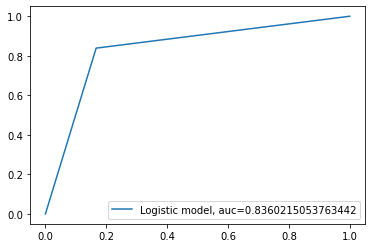

In [12]:
# Visualize the performance of a binary classifier. Check the performance of the classifier using roc auc curve.

y_pred_proba = grid_search.predict(X_test)
print(y_pred_proba[0])

fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(roc_auc)
plt.plot(fpr,tpr,label="Logistic model, auc="+str(roc_auc))
plt.legend(loc=4)
plt.show()

### Prediction on the test data and creating the sample submission file.

- Load the test data and store the `Id` column in a separate variable.
- Perform the same operations on the test data that you have performed on the train data.
- Create the submission file as a `csv` file consisting of the `Id` column from the test data and your prediction as the second column.

In [13]:
# Code starts here

test = pd.read_csv('test.csv')

# Storing the id from the test file
id_ = test['Id']

# Applying same transformation on test
test.drop('Id',axis=1,inplace=True)

# make predictions 
y_pred_test = grid_search.predict(test)

# Create a sample submission file
sample_submission = pd.DataFrame({'Id':id_,'insuranceclaim':y_pred_test})

# Convert the sample submission file into a csv file
sample_submission.to_csv('submission.csv',index=False)

# Code ends here.